# Cytoscape Ecosystem

Cytoscape is a well-known bioinformatics tool for displaying and exploring biological networks. The Cytoscape Ecosytem extends beyond the desktop software to include web apps (like cytoscape.js), community-contributed collections of networks (NDEx) and apps (AppStore), and the CyREST programmatic interface. Programmatic access and interactive display via R, Python and JS enable a braod range of applications in network anlaysis and visualization, leveraging the Cytoscape Ecosystem.

# py4Cytoscape

py4Cytoscape is a python package that connects python to a locally running instance of the Cytoscape desktop software via CyREST.

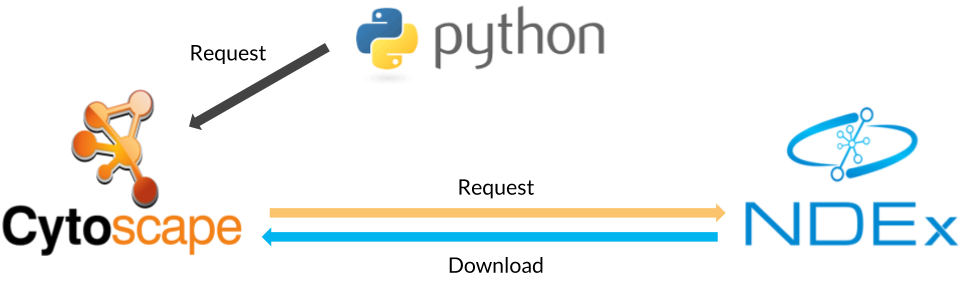

The sphinx documentation for the py4Cytoscape package is at https://py4cytoscape.readthedocs.io/en/latest/.

# Installation

The current release of py4cytoscape can be installed using the console:
```
pip install python-igraph requests pandas networkx
git clone git://github.com/bdemchak/py4cytoscape
cd py4cytoscape
python setup.py install
```

Or using a jupyter notebook:
```
!pip install python-igraph requests pandas networkx
!pip install git+https://github.com/bdemchak/py4cytoscape
!curl localhost:1234
```

The whole point of py4Cytoscape is to connect with Cytoscape. You will need to install and launch Cytoscape:

* Download the latest Cytoscape from http://www.cytoscape.org/download.php
* Complete the installation wizard
* Launch Cytoscape

In [1]:
# Import py4cytoscape
import py4cytoscape as py4

# PART I

## Load Network from NDEx

We will import a network from NDEx into the Cytoscape environment. Networks are provided a Universal Unique ID (UUID) by NDEx that can be used to reliably reference a particular network. The method returns a Cytoscape session ID (SUID) for the downloaded network, enabling us to reference it in the next steps.

By default, py4Cytoscape prints each REST transaction with Cytoscape. While this output can be very helpful for debugging, we will turn it off for the rest of the tutorial.

In [2]:
# Import a network from NDEx to Cytoscape
NETWORK_UUID = 'b1e9a489-bbe7-11ea-aaef-0ac135e8bacf'

network_suid = py4.cy_ndex.import_network_from_ndex(NETWORK_UUID)

[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/cyndex2/v1/networks), json: {'serverUrl': 'http://ndexbio.org/v2', 'uuid': 'b1e9a489-bbe7-11ea-aaef-0ac135e8bacf'}
[INFO] py4...S:  ǀOK[200]


In [3]:
# Disable logging
import logging, sys
logging.disable(sys.maxsize)

## Copy Visual Style

One of the easiest ways to apply a visual style to a network is to copy that style from another network. This lets you work on the style of your network in Cytoscape using the interactive style editor, then save the network to NDEx for future use as a template.

Using py4Cytoscape, we start by importing the template network. The name of the template network with the suffix "-Style" becomes the name of its style. The py4.styles.set_visual_style method assigns that style to another network, specified by that network's SUID.

In [4]:
# Get a style template network
STYLE_NETWORK_UUID = 'b1c1aa27-bbe7-11ea-aaef-0ac135e8bacf'

style_network_suid = py4.cy_ndex.import_network_from_ndex(STYLE_NETWORK_UUID)

In [5]:
# Apply the style to the network
style_name = py4.networks.get_network_name(style_network_suid) + '-Style'
py4.styles.set_visual_style(style_name, network=network_suid)

{'message': 'Visual Style applied.'}

## Apply Layout
py4Cytoscape can easily access the layouts available in Cytoscape!

In [6]:
# Apply layout to network
py4.layouts.layout_network('force-directed', network=network_suid)

# Show names of other potential layouts
py4.layouts.get_layout_names()

['attribute-circle',
 'stacked-node-layout',
 'degree-circle',
 'circular',
 'attributes-layout',
 'kamada-kawai',
 'force-directed',
 'cose',
 'grid',
 'hierarchical',
 'fruchterman-rheingold',
 'isom',
 'force-directed-cl']

## Save Network to NDEx

py4Cytoscape has a one-step method for saving networks from Cytoscape to NDEx. Here you can also control whether the network is publicly accessible or private to your account.

**Note:** By itself, "public" does not mean that users can find the network by searching NDEx. This is so that searches are not cluttered by networks that were convenient to make public but which are not intended for general use. To make a network findable in searches, you need to go to your account on the NDEx site and change that setting.  In the context of a tutorial where you access NDEx programmatically, you can see how important this is: no one wants to find the 20,000 networks you accidentally loaded to your account because of a bug in your code.

In [7]:
# Set the name of the network
new_name = py4.networks.get_network_name(network_suid) + ' (py4)'

py4.set_current_view(network_suid)
py4.networks.rename_network(new_name)

{'network': 51, 'title': 'Sonic Hedgehog (py4)'}

In [8]:
# Get NDEx credentials
USERNAME = input('Username: ')
PASSWORD = input('Password: ')

# Save the network to NDEx
py4.cy_ndex.export_network_to_ndex(USERNAME, PASSWORD, is_public=False, network=network_suid)

Username: ismbdemo
Password: ismbdemo2020


'a31815c1-c2e7-11ea-aaef-0ac135e8bacf'

# PART II

## Load Protein-Protein Interaction Network

Tabular data can be read in as a dataframe and then loaded as a network in Cytoscape.

The dataframe column named "source" automatically becomes the source node column, "target" becomes the target node column, and "interaction" becomes the edge interactions column. All other columns become edge attributes.

**Note:** If this step doesn't work, check that you have [installed python certificates](https://stackoverflow.com/questions/50236117/scraping-ssl-certificate-verify-failed-error-for-http-en-wikipedia-org).

In [9]:
import pandas as pd
PPI_DATA_URL = 'https://raw.githubusercontent.com/cytoscape/cytoscape-automation/master/for-scripters/Python/data/ap-ms-demo-data.csv'

# Import PPI data as a dataframe
ppi_data = pd.read_csv(PPI_DATA_URL, sep=',')
ppi_data

,Bait,Prey,UniProt,HEKScore,JurkatScore,AP-MS Score
0,GAG,THRAP3,Q9Y2W1,0.807,0.319,0.563
1,GAG,SEPSECS,Q9HD40,0.814,0.200,0.507
2,GAG,IVNS1ABP,Q9Y6Y0,0.753,0.260,0.506
3,GAG,DDX49,Q9Y6V7,0.824,0.000,0.412
4,GAG,PRMT1,Q99873,0.758,0.037,0.397
...,...,...,...,...,...,...
494,GP41,TOMM40,O96008,0.762,0.000,0.381
495,GP41,GLG1,Q92896,0.000,0.762,0.381
496,GP41,NGLY1,Q96IV0,0.000,0.756,0.378
497,GP41,SEC62,Q99442,0.000,0.751,0.376


In [10]:
# Rename dataframe columns
py4_ppi_data = ppi_data.rename(columns={'Bait': 'source', 'Prey': 'target'})

# Load PPI network
ppi_network_suid = py4.networks.create_network_from_data_frames(
    edges=py4_ppi_data, 
    title='AP-MS Demo Data (py4)',
    collection='AP-MS Demo Data'
)

Applying default style...
Applying preferred layout


## Load Expression Data

Now, the network can be annotated with expression data, provided a column in the datset matches a column in the network’s Node Table.

In [11]:
# Load expression data as a dataframe
EXPRESSION_DATA_URL = 'https://raw.githubusercontent.com/cytoscape/cytoscape-automation/master/for-scripters/Python/data/annotation-data.csv'

expression_data = pd.read_csv(EXPRESSION_DATA_URL, sep=',')
expression_data

,P-value,FCAbsolute,Regulation,GeneSymbol
0,0.027029,2.006743,up,ZNF594
1,0.012443,2.644313,up,GRB10
2,0.007062,1.881797,up,MTHFD2
3,0.044250,3.439971,up,ATF3
4,0.031662,1.955409,up,PMAIP1
...,...,...,...,...
311,0.007729,2.957946,down,SLC2A5
312,0.009410,1.861381,down,NaN
313,0.019493,1.599525,down,NaN
314,0.001827,1.699154,down,INF2


In this example, the column “GeneSymbol” matches the source nodes in our network in a default “name” column.

In [12]:
# Load table data
py4.tables.load_table_data(expression_data, data_key_column='GeneSymbol')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/py4cytoscape-0.0.1-py3.8.egg/py4cytoscape/tables.py:410: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


'Success: Data loaded in defaultnode table'

## Save Network to NDEx

Again, we can save this network to NDEx, including the associated expression data

In [13]:
# Save network to NDEx
py4.cy_ndex.export_network_to_ndex(USERNAME, PASSWORD, is_public=False, network=ppi_network_suid)

'b11c0963-c2e7-11ea-aaef-0ac135e8bacf'